<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Supervised%20Learning/Neural%20Networks/SL_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Define a custom object dictionary mapping 'softmax_v2' to 'softmax'
custom_objects = {'softmax_v2': tf.keras.activations.softmax}

mnist =  tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8644 - loss: 0.4720
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9646 - loss: 0.1130
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9772 - loss: 0.0730


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1093
0.09776300191879272 0.9711999893188477


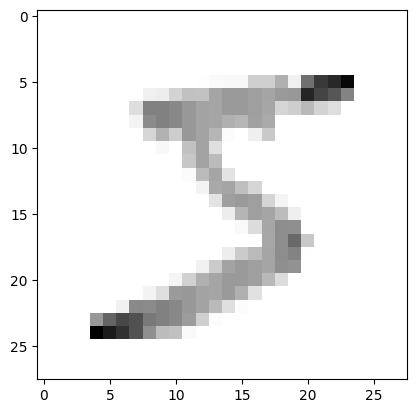

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

print(x_train[0])

In [ ]:
model.save('epic_num_reader.h5')

In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.h5', custom_objects=custom_objects)

In [ ]:
predictions = new_model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(predictions)

[[6.5420589e-09 5.7336624e-10 4.9650748e-07 ... 9.9999875e-01
  9.5729158e-09 1.9818135e-07]
 [5.7262582e-07 3.4697633e-03 9.9650061e-01 ... 2.2749726e-08
  1.9873694e-07 1.7324320e-08]
 [4.0151232e-08 9.9986291e-01 3.2053972e-06 ... 5.9533224e-05
  3.7564932e-05 7.4263249e-07]
 ...
 [9.5988479e-09 2.1557282e-06 1.3535356e-08 ... 1.6778745e-04
  4.6198329e-06 2.3158487e-04]
 [4.4720056e-07 2.8250927e-08 9.4135551e-08 ... 6.6421326e-06
  7.8206933e-05 1.2877436e-07]
 [3.0411853e-05 7.1317547e-09 2.2981558e-06 ... 1.1284139e-09
  6.2904104e-07 3.1476848e-09]]


In [ ]:
import numpy as np

print(np.argmax(predictions[0]))

7


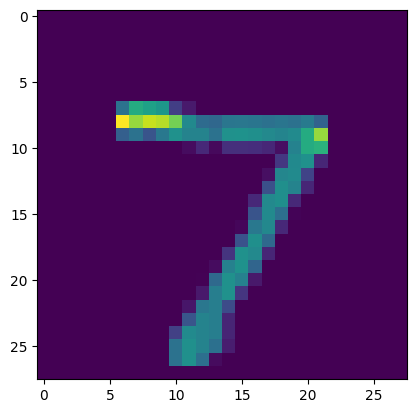

In [ ]:
plt.imshow(x_test[0])
plt.show()

# Applying the Neural Network Algorithm on CiFAR-10 Dataset

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load a unique dataset: CIFAR-10 (color images, 32x32 pixels)
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# Define a more sophisticated model architecture with dropout and batch normalization
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model and track the history for performance analysis
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.1639 - loss: 2.3069 - val_accuracy: 0.2220 - val_loss: 2.1002
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.2075 - loss: 2.1396 - val_accuracy: 0.2537 - val_loss: 2.0695
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.2141 - loss: 2.1310 - val_accuracy: 0.2391 - val_loss: 2.0991
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.2141 - loss: 2.1342 - val_accuracy: 0.2173 - val_loss: 2.1303
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.2022 - loss: 2.1539 - val_accuracy: 0.2294 - val_loss: 2.1424
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.2023 - loss: 2.1566 - val_accuracy: 0.2326 - val_loss: 2.1147
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.2148 - loss: 2.1334 - val_accuracy: 0.1942 - val_loss: 2.1310
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.2062 -

In [ ]:
# Evaluate the model on test data
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2323 - loss: 2.1133
Test Loss: 2.1204, Test Accuracy: 0.2253


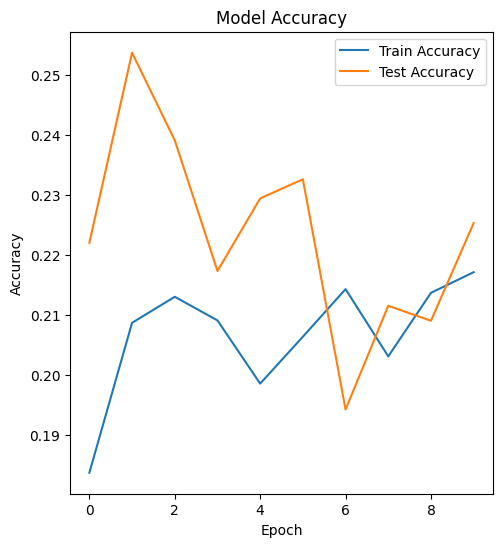

In [ ]:
# Performance analysis: Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

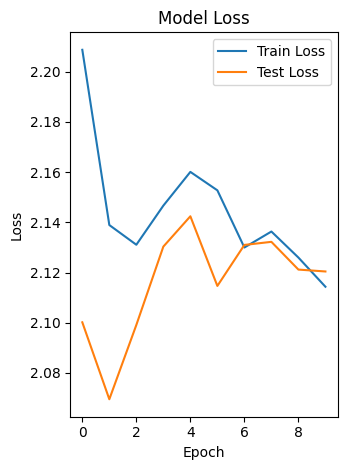

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Confusion Matrix and Classification Report
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.27      0.23      1000
           1       0.43      0.36      0.39      1000
           2       0.14      0.02      0.03      1000
           3       0.00      0.00      0.00      1000
           4       0.20      0.06      0.09      1000
           5       0.43      0.00      0.01      1000
           6       0.16      0.86      0.26      1000
           7       0.70      0.06      0.11      1000
           8       0.45      0.12      0.20      1000
           9       0.32      0.51      0.39      1000

    accuracy                           0.23     10000
   macro avg       0.30      0.23      0.17     10000
weighted avg       0.30      0.23      0.17     10000



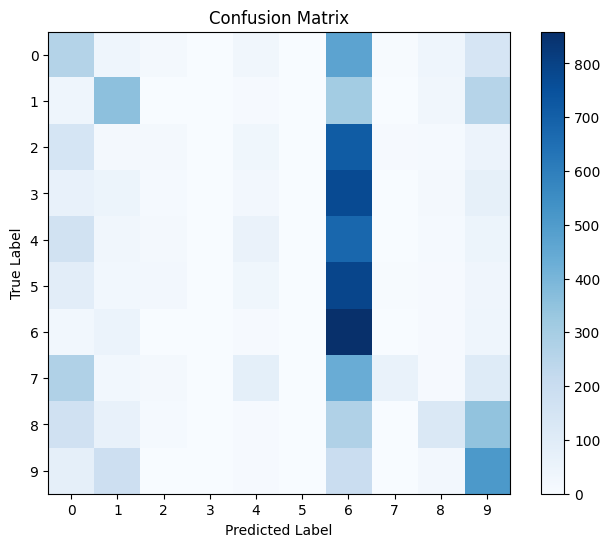

In [ ]:
# Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

In [ ]:
# Save the model
model.save('cifar10_model.h5')

In [ ]:
# Load the model and make predictions
new_model = tf.keras.models.load_model('cifar10_model.h5', custom_objects={'softmax_v2': tf.keras.activations.softmax})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


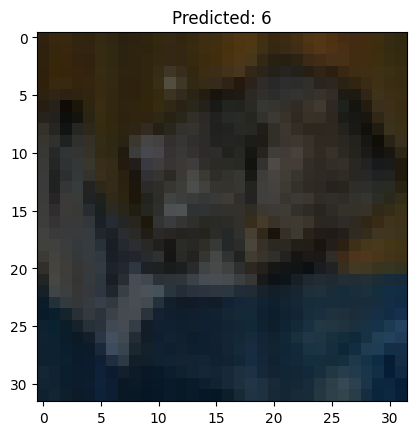

In [ ]:
# Test a random image from the test set
plt.imshow(x_test[0])
plt.title(f"Predicted: {np.argmax(new_model.predict(np.expand_dims(x_test[0], axis=0)))}")
plt.show()